In [ ]:
from sklearn.datasets import make_regression #to generate random regression problem

In [ ]:
dataset = make_regression(n_samples=6000, n_features=6, n_informative=6, n_targets=1, bias=0.3, effective_rank=None, tail_strength=0, noise=0.5, shuffle=True)

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df=pd.DataFrame(dataset[0])
df_y=pd.DataFrame(dataset[1])

In [ ]:
df.size #to get the number of elements

36000

In [ ]:
df

,0,1,2,3,4,5
0,1.079339,0.637598,-0.762829,-1.754699,-1.578863,0.006712
1,-1.123459,-0.103387,-0.056803,-1.058044,1.042504,-1.173671
2,0.732004,0.823098,1.362567,0.216464,-0.351961,0.545925
3,0.989651,-0.746435,-1.196921,-1.030158,-0.437733,-0.394561
4,1.033317,0.240153,0.710439,0.739705,0.215513,-0.727685
...,...,...,...,...,...,...
5995,-1.269847,-0.478408,-1.854002,1.470623,0.301884,0.166223
5996,0.248330,-0.751015,0.374900,-0.374333,0.232255,-0.256834
5997,-1.006889,1.005652,1.636539,-0.863082,0.473070,0.452297
5998,-0.755622,0.625330,-1.205658,-0.861068,0.691404,0.455874


In [ ]:
df[1]

0       0.637598
1      -0.103387
2       0.823098
3      -0.746435
4       0.240153
          ...   
5995   -0.478408
5996   -0.751015
5997    1.005652
5998    0.625330
5999   -0.877433
Name: 1, Length: 6000, dtype: float64

In [ ]:
df_y

,0
0,-139.037792
1,-101.039907
2,116.801086
3,-180.190865
4,70.581207
...,...
5995,54.589706
5996,-86.067310
5997,71.656812
5998,18.195781


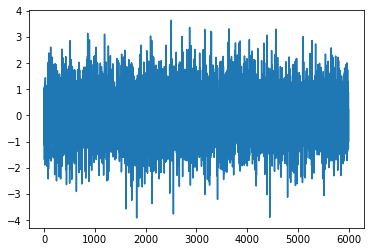

In [ ]:
plt.plot(df[0])

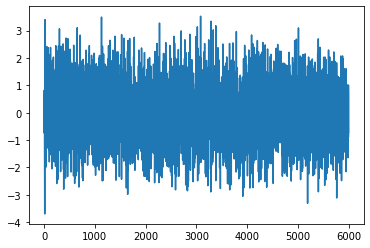

In [ ]:
plt.plot(df[1])

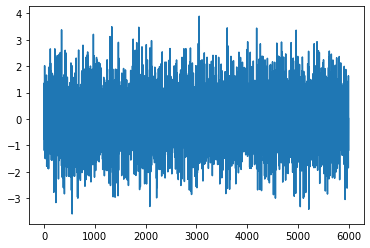

In [ ]:
plt.plot(df[2])

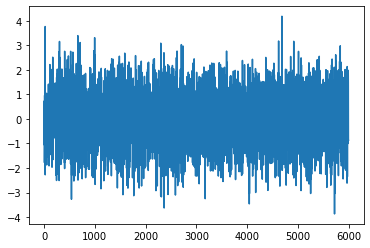

In [ ]:
plt.plot(df[3])

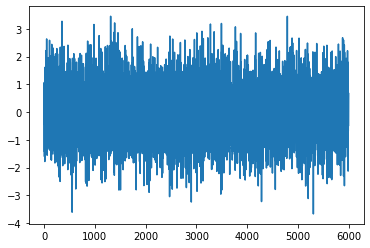

In [ ]:
plt.plot(df[4])

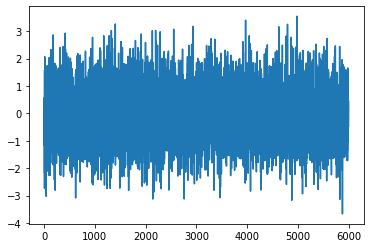

In [ ]:
plt.plot(df[5])

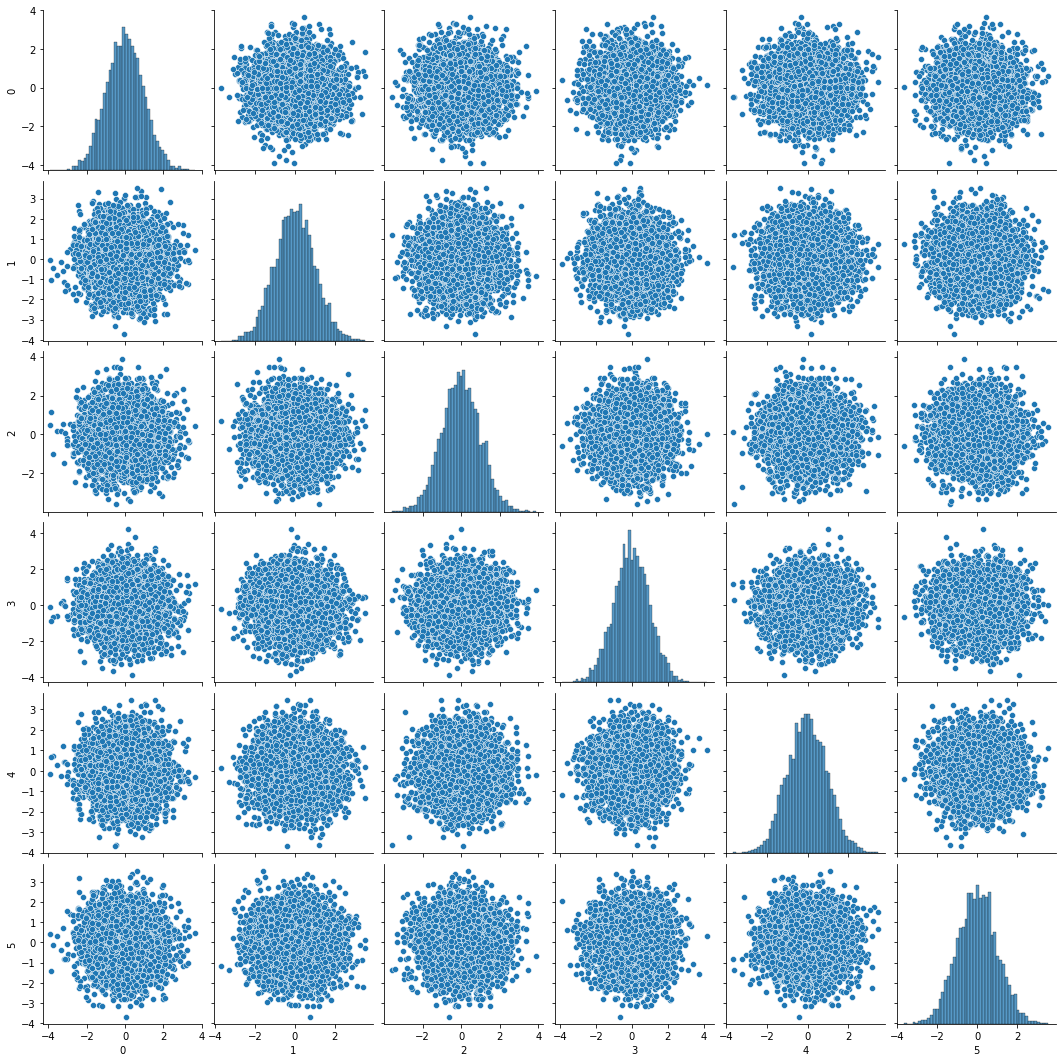

In [ ]:
import seaborn
import matplotlib.pyplot as plt
 
seaborn.pairplot(df)
# to show
plt.show()

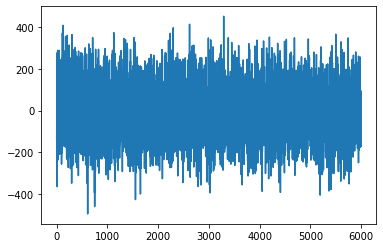

In [ ]:
plt.plot(df_y)

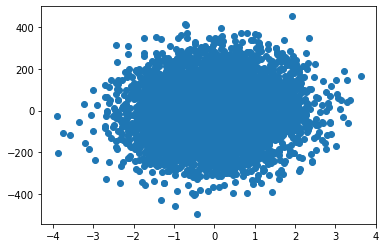

In [ ]:
plt.scatter(df[0], df_y)
#plt.scatter(df[1], df_y)

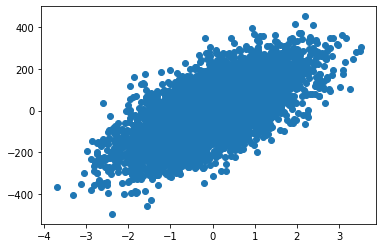

In [ ]:
plt.scatter(df[1], df_y)

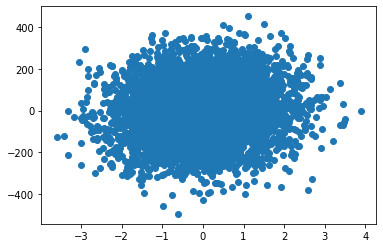

In [ ]:
plt.scatter(df[2], df_y)

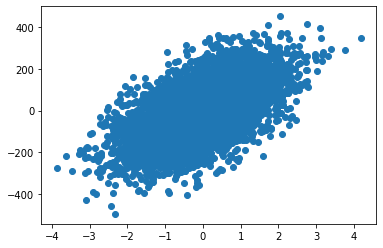

In [ ]:
plt.scatter(df[3], df_y)

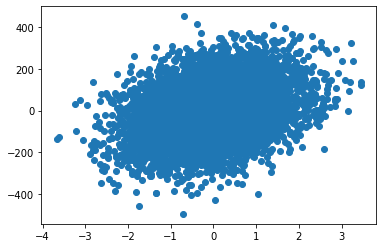

In [ ]:
plt.scatter(df[4], df_y)

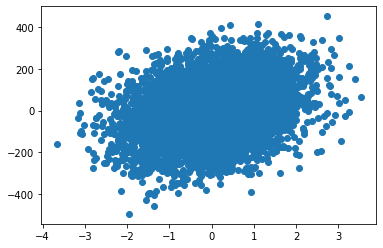

In [ ]:
plt.scatter(df[5], df_y)

In [ ]:
import math
def preprocessing_sigmoid(x):
    return 1/1+(math.e)**(-x)

In [ ]:
df[0]

0       1.079339
1      -1.123459
2       0.732004
3       0.989651
4       1.033317
          ...   
5995   -1.269847
5996    0.248330
5997   -1.006889
5998   -0.755622
5999    0.861698
Name: 0, Length: 6000, dtype: float64

In [ ]:
preprocessing_sigmoid(df[0])

0       1.339820
1       4.075475
2       1.480944
3       1.371706
4       1.355825
          ...   
5995    4.560308
5996    1.780102
5997    3.737073
5998    3.128936
5999    1.422444
Name: 0, Length: 6000, dtype: float64

In [ ]:

df_preprocessed = []

for i in range(0,6):
    df_preprocessed.append(list(map(preprocessing_sigmoid,df[i])))

In [ ]:
df_preprocessed[0][0]

1.3398201773301712

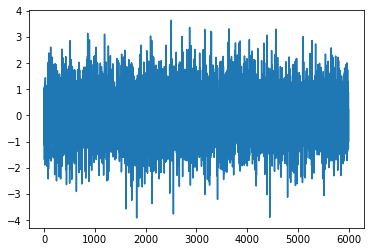

In [ ]:
plt.plot(df[0])

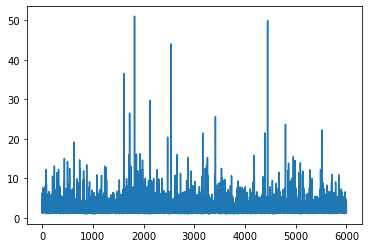

In [ ]:
plt.plot(df_preprocessed[0])

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(df,df_y,test_size=0.25)

In [ ]:
#Tensorflow starts from here

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
train_X.shape

(4500, 6)

In [ ]:
ANN = Sequential([
    Dense(64,activation="LeakyReLU",input_shape=(None,6)),
    Dense(128,activation="LeakyReLU"),
    Dense(256,activation="LeakyReLU"),
    Dense(128,activation="LeakyReLU"),
    Dense(1)
])

In [ ]:
import tensorflow as tf

In [ ]:
ANN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error',metrics=['mae'])

In [ ]:
#train_X.shape
train_y.shape

(4500, 1)

In [ ]:
ANN.fit(train_X,train_y,epochs=1000)

Epoch 1/1000


141/141 [==============================] - 1s 3ms/step - loss: 29.4665 - mae: 29.4665
Epoch 2/1000
141/141 [==============================] - 0s 3ms/step - loss: 2.6002 - mae: 2.6002
Epoch 3/1000
141/141 [==============================] - 0s 3ms/step - loss: 2.0339 - mae: 2.0339
Epoch 4/1000
141/141 [==============================] - 0s 3ms/step - loss: 1.9370 - mae: 1.9370
Epoch 5/1000
141/141 [==============================] - 0s 3ms/step - loss: 1.7886 - mae: 1.7886
Epoch 6/1000
141/141 [==============================] - 0s 3ms/step - loss: 1.7059 - mae: 1.7059
Epoch 7/1000
141/141 [==============================] - 0s 3ms/step - loss: 1.4176 - mae: 1.4176
Epoch 8/1000
141/141 [==============================] - 0s 3ms/step - loss: 1.3795 - mae: 1.3795
Epoch 9/1000
141/141 [==============================] - 0s 3ms/step - loss: 1.5537 - mae: 1.5537
Epoch 10/1000
141/141 [==============================] - 0s 3ms/step - loss: 1.3396 - mae: 1.3396
Epoch 11/1000
141/141 [=================

In [ ]:
df

,0,1,2,3,4,5
0,1.079339,0.637598,-0.762829,-1.754699,-1.578863,0.006712
1,-1.123459,-0.103387,-0.056803,-1.058044,1.042504,-1.173671
2,0.732004,0.823098,1.362567,0.216464,-0.351961,0.545925
3,0.989651,-0.746435,-1.196921,-1.030158,-0.437733,-0.394561
4,1.033317,0.240153,0.710439,0.739705,0.215513,-0.727685
...,...,...,...,...,...,...
5995,-1.269847,-0.478408,-1.854002,1.470623,0.301884,0.166223
5996,0.248330,-0.751015,0.374900,-0.374333,0.232255,-0.256834
5997,-1.006889,1.005652,1.636539,-0.863082,0.473070,0.452297
5998,-0.755622,0.625330,-1.205658,-0.861068,0.691404,0.455874


In [ ]:
pred=ANN.predict(test_X)

47/47 [==============================] - 0s 1ms/step


In [ ]:
test_y.size

1500

In [ ]:
pred.shape

(1500, 1)

In [ ]:
pred=pd.DataFrame(pred)

In [ ]:
pred=pred.values.tolist()
gd_th=test_y.values.tolist()

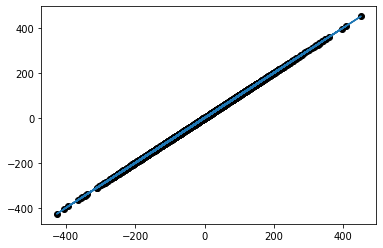

In [ ]:
plt.scatter(pred,test_y,color='black')
plt.plot(pred,gd_th)